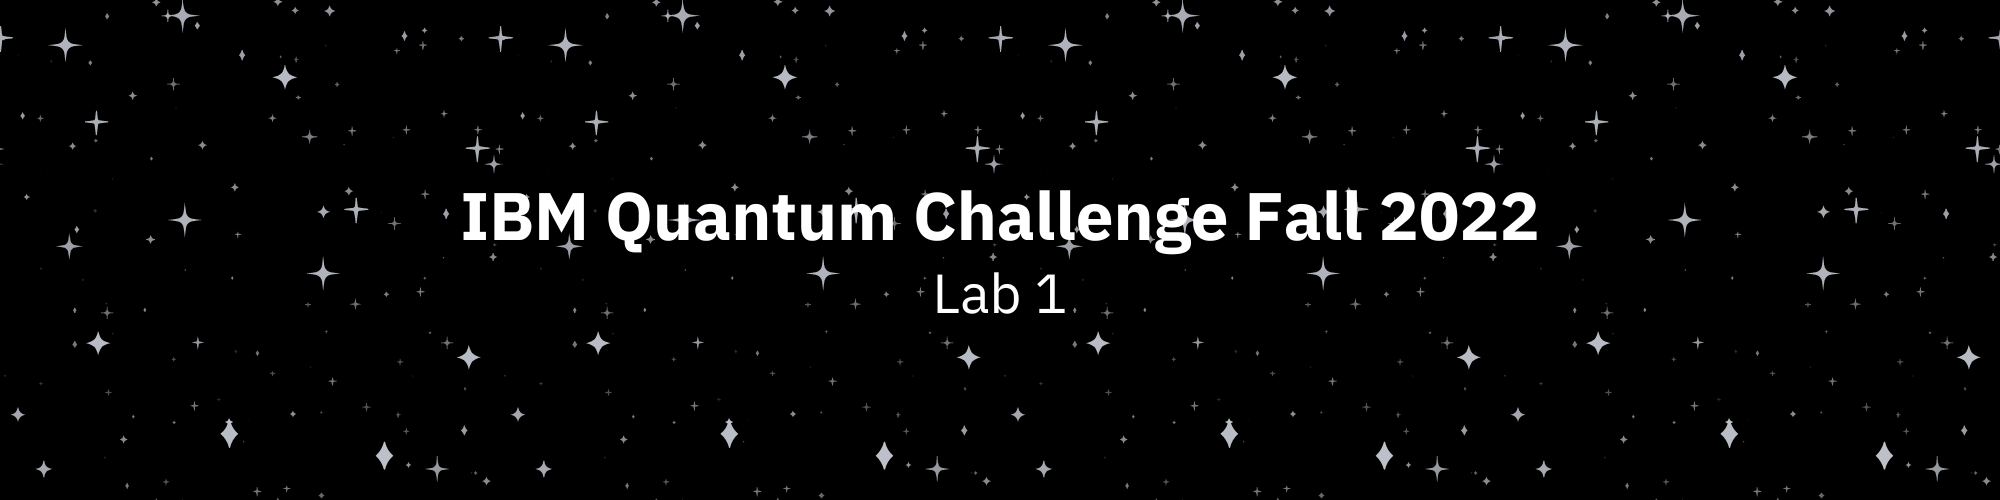

# Introduction to Primitives on Qiskit Runtime

# Table of Contents
- **[Story](#Story)**
- **[Part I: Introduction to Primitives](#Part-I:-Introduction-to-Primitives)**
- **[Part II: Getting Started with Qiskit Runtime](#Part-II:-Getting-Started-with-Qiskit-Runtime)**
- **[Part III: How to Use Primitives](#Part-III:-How-to-Use-Primitives)**
    - **[Exercise 1: build the Bernstein Vazirani function](#exercise1)**
    - **[Exercise 2: bind parameters to a parametrized circuit using `Sampler`](#exercise2)**
    - **[Exercise 3: build an Estimator routine to compute the expectation values of Hamiltonians](#exercise3)**
- **[Part IV: Error Mitigation Opening](#Part-IV:-Introduction-to-Error-Mitigation-and-Error-Suppression-on-Qiskit-Runtime)**
    - **[Exercise 4: choose the correct statements about error correction](#exercise4)**
- **[Part V: Example Using Both Primitives](#Part-V:-Example-Using-Both-Primitives---Unscrambling-the-message!)**
    - **[Exercise 5: apply noise mitigation techniques](#exercise5)**
    - **[Exercise 6: verify what the message is](#exercise6)**

# Story

## Opening Story - Prologue

Watch the opening story video here: **[Fall Challenge Opening Story](https://youtu.be/-oXS7X1I-LM)**

<details><summary><b>**Click to Expand: Video Transcript**</b></summary>
<p>

You are the esteemed Captain of Earth’s very first faster-than-light starship, leading humanity into an era of space exploration. 

On your journey you discover magnificent things, from alluring other worlds to cosmic phenomena you never dreamed possible.

A scientist at heart, your curiosity drives you to study everything you encounter. 

One glorious day you discover a black hole. You and your crew rejoice! This is your chance to move beyond theory and study a real black hole first-hand.

You anchor the starship at what you believe to be a safe distance from the black hole, according to your calculations. But, for some reason, your calculations are wrong.

And the pull of the black hole is simply too strong.

Bit by bit, slowly yet steadily, you drift toward the heart of the black hole...
        
</p>
</details>

## Chapter 1

Yellow alert. Commotion. You and your crew scramble, trying countless ways to escape the black hole’s pull. But your efforts are futile and cost you a lot of fuel. 


Technically you are still safe, drifting in a loose orbit around the black hole that decays very slowly. According to your calculations, it will be a few days before you either fall in completely or are spaghettified.


But how on earth will you escape?


After much deliberation, your Chief Science Officer comes up with something you haven’t tried yet: a gravity assist maneuver. The starship would essentially slingshot around one of the many planets that orbit the black hole, and use the relative movement to escape the black hole’s influence.


It could work.


Just before you give the command to search for a planet suitable for such a maneuver, your comms pick up a scrambled message. Strangely, its signature is the same used on Earth. This shouldn’t be possible; you are the first people in space from Earth!


And so, you track down the source beacon a few hundred kilometers away. 


To your utter surprise and dismay, you discover a beacon that’s identical to the ones your starship carries. How is this possible? 


It appears more tattered and worn than yours, as if battered by the relentless sands of time. You check all the beacons you have on board, and discover they are all intact. 


You have a feeling this beacon and the message it carries is important, somehow, and divert all efforts to unscrambling and decoding this message. 


Your decoding protocol involves unscrambling the message header and inputting the sequence to your comms decoder. Complete the exercises below to successfully build an unscrambling routine and trigger the decoding sequence.

# Part I: Introduction to Primitives

Primitives are meant to serve as an foundational, elementary, building blocks for users to perform quantum computations, developers to implement quantum algorithms, and researchers to solve complex problems and deliver new applications.

But before we go into its significance in terms of quantum computation, let's examine what the term "primitive" actually means and what it implies for us.

On asking to define a primitive element, a **biologist** may likely respond: "A character, trait, or feature that is inherited from the common ancestorial group". A **mathematician's** answer to the same question may be along the lines of, "For finite fields, an element that is a generator of multiplicative element groups of that field".  A **designer working on CAD models** might describe it to you as, "The simplest available shape on a system that can be used to build upon complex geometric forms."

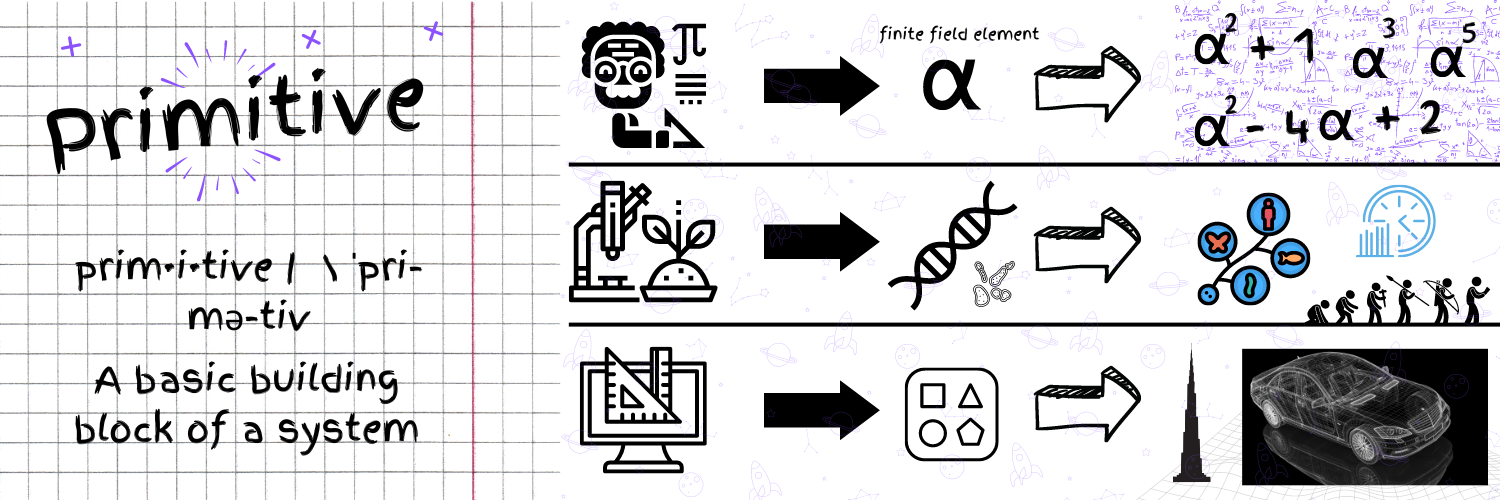

What do we observe from all these responses? All definitions seem to have one thing in common. They ultimately define primitive being a **basic element** that serves as a building block for more complex elements.

Now, if we were to look at it with respect to general computing, what would it mean when we term something as "primitive"? Let's take a look at the concept of language primitives. A language primitive can be defined as a simplest, indivisible element available in a programming language. You have probably heard that everything in a computer is just stored in binary; as zeros and ones, and that is completely true. However, if we were to take binary digits as a primitive construct for programming languages, we would really have a tough time to get things done. So a more appropriate approach would be to define the term primitive with respect to a high level programming language, in such a way that we categorise them into something, _that while being indivisible_, it is still easier to understand and program with.

One good example for this in our language primitive concept are primitive data types. Depending on the language you choose, you will have data types that are generally indivisible and these are used to construct more complex datatypes depending on how you choose using them. For example: `int`, `float`, `string` and `boolean` are _generally considered_ to be the primitive data types in Python, whereas an **array of strings** or, a **list of names**, a **tuple of decimal coordinates** or **set of integers** are non-primitive data types that are built upon the primitive data types.

Now, can we define the same with respect to a general function in programming? You can define a primitive function as a basic interface or segment of code that can be used to build more complex and sophisticated program elements or interfaces depending on how you use them.

## Ok, what does this have to do with Quantum?

As explained above with respect to a language primitive, although we know that binary digits or machine-code are technically core primitive constructs as a program is compiled down, we still define higher level primitive terms with categorisations that enable us to build a program more accessibly and not at a lower machine code level. Most of the time we expect most major compiled languages to have efficient compiler routines built in, and given that, we are expecting an optimized execution workflow which is optimized for the systems we own. Therefore we can create our programs using the programming language's defined primitives and syntax.

**So now the question with respect to Quantum: Is there a way to define a similar construct for a quantum computation routine and workflow?**

## Introducing the Qiskit Runtime Primitives:

![Qiskit Runtime architecture](https://cloud.ibm.com/docs-content/v1/content/fe08b8e3a114015612ab3ed112afa281d6ce896a/quantum-computing/images/Qiskit_Runtime_architecture.png)

To maximize a given _Quantum workflow_, which is predominantly a QPU on cloud, we now have a computing programming model that conforms to a service which is built to optimize workloads with efficient execution at scale. Since last year, the Qiskit Runtime service has been built on the concept of containerized execution; an execution model, where you have multiple elements of computation packaged and run portably on any system. Rather than sending single circuits to cloud, the entire program is packaged with its dependencies to run on cloud, thereby saving latency and reducing overhead for iterative loops.

With newer developments in the Qiskit Runtime service, we now have updated capabilities not just in the Runtime service, but a focus on the programming experience for scale with the introduction for a new programming model which acts as an interface to the Qiskit Runtime service: **Qiskit Runtime Primitives**

## Qiskit Runtime Primitives: Introducing Sampler and Estimator

To start off defining primitives for quantum, we have two candidates (for now). Although there are several ways to define the fundamental components for a quantum computational procedure, there will be more additions to this primitives construct down the line. For now, let's stick to two basic primitives which we define here. 

With respect to the key information point of interest here, the core capability of quantum computers that sets them apart from classical computers is their ability to generate non-classical probability distributions at their outputs. The inherent nature of highly probabilistic computational results obtained needs us to have multiple runs for the same circuit to generate usable information in the form of probability distributions. The native operations that we can do with probability distributions are to sample from it or to estimate quantities from it. 

Based on these two information points of interest here which are: **a) Sampling probability distributions** and **b) Estimating a value**, we arrive at our proper named two primitives: **The Sampler** and **The Estimator**

### The Sampler

The Sampler essentially does what it says in its name. By sampling from its output, it estimates the entire quasi-probability distribution of a given quantum circuit. This is a program that takes a user circuits as an input and generates an error-mitigated readout of quasiprobabilities. This provides users a way to better evaluate shot results using error mitigation and enables them to more efficiently evaluate the possibility of multiple relevant data points in the context of destructive interference.

This is in essence very much similar to the familiar output of "counts" which you usually get when you run a circuit, but here, you obtain a quasi-probability distribution output as a result of the error mitigation routine involved.

Simply put, you have access to a greater range of information data points that you can use however you like. The information obtained from a quasi-probability distribution representation may be of more relevance for investigating likelihoods of true probability distributions and computing unbiased expectation value points in exchange for a sampling overhead. These distributions, broadly speaking, can behave similar to true probability theory in some sense with the difference being that they have a few constraints of the original theory relaxed, one of which is the possiblity of having negative data points representing "negative" probability (but collectively still summing up to 1). These, while should not be mistaken for true probabilities, can be estimated to a nearest true probability distribution upto certain error bounds based on the context of usage. Few example use cases where Sampler could be of interest are: Grovers search, QSVM routines, Stabilizer computation, Optimization routines etc. 

While the Sampler gives the complete distribution over the entire output, there may be times where you may be interested in information about particular outcomes. Let us look at **the Estimator**!

### The Estimator

The Estimator essentially calculates and interprets expectation values of operators of interest. This is a program interface that takes circuits and observables and allows users to selectively group between circuits and observables for execution to efficiently evaluate expectation values and variances for a given parameter input. This primitive allows users to efficiently calculate and interpret expectation values of quantum operators required for many algorithms.

Those who are most interested in finding a final solution to a given problem — but who don’t need to examine the full distribution of counts — will find the Estimator primitive more useful. This routine is something that can be useful to basically most near-term quantum algorithms, the most common examples to be taken are the variational class of algorithms. The Estimator calculates expectation values of quantum observables in addition to a circuit so they are essential to be an input. Such observables can encode a large variety of things such as the electronic structure of a molecule, the cost function for an optimization problem and much more.

## Why use Qiskit Runtime?

So now the question arises: why even bother with this new programming paradigm at all? Answer: To interface with the Qiskit Runtime service and leverage the powerful service and framework on which it is built.

Re-calling back to the explanation in section 1 where we define language primitives that facilitate us to develop on a higher level while relying on the compiler for having an optimized workflow, you can expect Runtime to address these most common areas:

- **Efficiency** : Highly optimized routines and options for iterative workloads designed for quantum backends
- **Latency** : Scheduling, job prioritizing and shared caching using the Sessions framework for lower latency and faster turn result times.
- **Consistency** : Consistent programming model to build upon complex routines across the service with newer additions to complement the existing primitive model
- **Customizablity** : Management of iterative routines with customized circuits based on its context and paramaters of the job
- **Error Mitigation and Suppression** : Error mitigation and suppression research advancements through simple abstracted interfaces for increased quality of information.

With the Qiskit Runtime service, you can leverage these advantages right away using the primitive programming models as described. This notebook shall introduce how to use the Sampler and Estimator primitives with the Sessions framework and showcase a few of the error mitigation strategies that are currently available and still growing. The subsequent notebooks will build upon this intuition and showcase how you can utilize this primitive programming model and build upon some of the more common algorithmic routines in domains of Machine Learning, Optimization and Chemistry

Let's take a look how to use the Qiskit Runtime service and build programs upon the primitives construct.

###  Importing the required libraries

In [1]:
import time
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit.tools.visualization import plot_histogram
# %config InlineBackend.figure_format='retina'

In [2]:
round(np.pi, 3)

3.142

# Part II: Getting Started with Qiskit Runtime

We shall get started with Qiskit Runtime. Qiskit Runtime is already installed and setup for you in the IBM Quantum Lab instance of the IBM Quantum Challenge you are in.

If you are running on your local systems, you may need to install Qiskit Runtime packages which can be dones uing: `pip install qiskit-ibm-runtime`. If you have navigated to the IBM Quantum Lab throught the IBM Quantum Challenge portal, then everything should already be setup for you.

To start off, the first thing to do here is to define `QiskitRuntimeService` instance to run the program on. We can use this to call the currently available two primitives as needed; `Sampler` and `Estimator` and run them on Qiskit Runtime. 

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler, Estimator

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


The block below saves your Runtime account credentials for your current environment. The `channel` keyword argument lets the Runtime know whether you are using the regular IBM Quantum (`channel='ibm_quantum'`) or IBM Cloud (`channel='ibm_cloud'`). We will be using the `ibm_quantum` channel for all our runs. This cell can be run just once and your credentials should be saved for that environment. And for the `token` keyword argument, your API token value is found in this link: **[quantum-computing.ibm.com/account](https://quantum-computing.ibm.com/account)**.

If you are on the IBM Quantum Lab, you can simply call the `QiskitRuntimeService` with just the channel in your subsequent runs.

In [4]:
#Save the Runtime account credentials if you have not done so already
#If you need to overwrite the account info, please add `overwrite=True`
QiskitRuntimeService.save_account(channel='ibm_quantum', token='4baffa77ba28d2cd58f17da132d9296ed9be97e878a6dd2518e2def597a7a687dafedf8441678c729220e05b5781dda7cd2bddb28393109739bdcd5524889784', overwrite=True)

In [5]:
service = QiskitRuntimeService(channel='ibm_quantum')

Now that your service is setup, the service allows you to view all the backends that you have access to. Let's run the command below to display all the available backends that can utilize Qiskit Runtime.

In [6]:
service.backends()

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_oslo')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibmq_manila')>]

In [7]:
len(service.backends())

11

In [8]:
type(service.backends()[0])

qiskit_ibm_runtime.ibm_backend.IBMBackend

In [127]:
# service.backends??

# Part III: How to Use Primitives

Let us slowly start to build our intuitions towards building with the primitives. The first primitive we shall be looking into will be the Sampler primitive. Before that, a small note about the concept of Sessions:

To use the primitives on cloud, we have to use a context manager to make sure that we are opening and closing the session safely. This is done by using the `Session` keyword where the constructor would take in the relevant parameters and the Sampler and Estimator methods to pass in the jobs in the queue. The concept of such a session or factory allows you to define a job as a collection of iterative calls to the quantum computer. When you start a session, it caches the data you send so it doesn’t have to be transmitted to the Quantum Datacenter on each iteration. We use the `Options` to configure the current session and its parameters and control its execution environment. This format makes it possible for you to run a wide range and variety of primitive program calls all at once.

To learn how to use primitives, we shall demonstrate an example with the use of the Bernstein-Vazirani algorithm.

# 3.1 Example using Sampler

### Bernstein-Vazirani algorithm

This algorithm is one of special quantum algorithms which showed that there can be advantages in using a quantum computer as a computational tool for more complex problems.

There is a function returning the bitwise product of the input with a hidden string of bits $ s $. Its length is $ n $.

$$ f(x) = s ⋅ x (\mathrm{mod} 2) $$

To find the hidden string, we would need to call the function $f$ for $ n $ times. However, using a quantum computer, we can solve this problem with 100% confidence after **only one call** to the function . The quantum Bernstein-Vazirani algorithm to find the hidden bit string is very simple:

1. Initialize the inputs qubits to the state $|0\rangle^{\otimes n}$, and output qubit to $|-\rangle$.
2. Apply Hadamard gates to the input register
3. Query the oracle
4. Apply Hadamard gates to the input register
5. Measure

For more in detailed information about the Bernstein-Vazirani algorithm, feel free to check out this helpful chapter in the Qiskit textbook: **https://learn.qiskit.org/course/ch-algorithms/bernstein-vazirani-algorithm**. Or you may refer Ep. 6 of Coding with Qiskit Season 1 in Qiskit Youtube: **[Bernstein-Vazirani Algorithm](https://youtu.be/sqJIpHYl7oo)**.

In the below, there is an example for the Bernstein Vazirani algorithm to find the hidden bit string "001".

In [9]:
hidden = "001"
print(len(hidden))

3


For this hidden string, we need 3 input qubits and 1 output qubit.

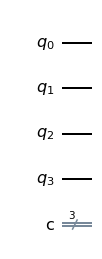

In [10]:
# Make a quantum circuit
qc = QuantumCircuit(4, 3)
display(qc.draw(output="mpl"))

Step 1. Initialize the inputs qubits to the state $|0\rangle^{\otimes n}$, and output qubit to $|-\rangle$.

At first every qubit is initialized as $|0\rangle$ so we don't have to apply any gate for input qubits. However, the output qubit state should be changed as $|-\rangle$. For it, we will apply X-gate and then H-gate (Hadamard gate).

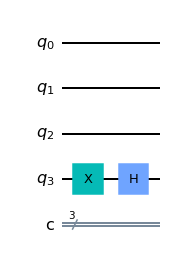

In [11]:
qc.x(3)
qc.h(3)
display(qc.draw(output="mpl"))

Step 2. Apply Hadamard gates to the input register.

We will apply Hadamard gates to each input qubit.

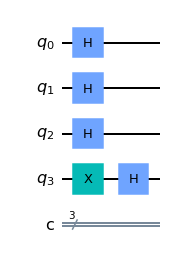

In [12]:
qc.h(0)
qc.h(1)
qc.h(2)
display(qc.draw(output="mpl"))

Step 3. Query the oracle.

We will use CNOT gate to query the oracle. As our hidden circuit is "001", we will apply CNOT gate to qubit 0 and the output gate. Note: In Qiskit, numbers are assigned to the bits in a string **from right to left**.

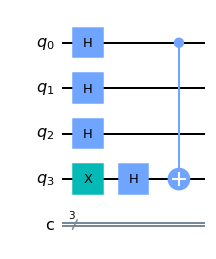

In [13]:
qc.cnot(0,3)
display(qc.draw(output="mpl"))

Step 4. Apply Hadamard gates to the input register.

We will apply Hadamard gates to each input qubit again.

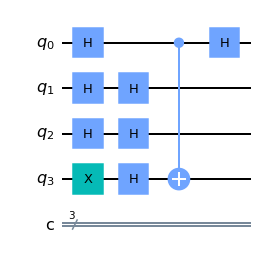

In [14]:
qc.h(0)
qc.h(1)
qc.h(2)
display(qc.draw(output="mpl"))

Step 5. Measure.

We will measure all the input qubits with [`measure`](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.measure.html) method.

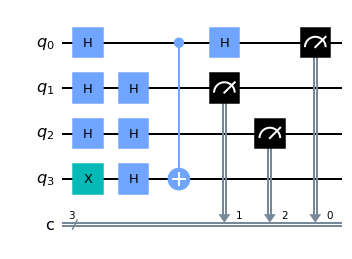

In [15]:
qc.measure([0,1,2], [0,1,2])
display(qc.draw(output="mpl"))

The circuit is ready to run on the simulator. You can check the result by running the cell below.

{'001': 1024}


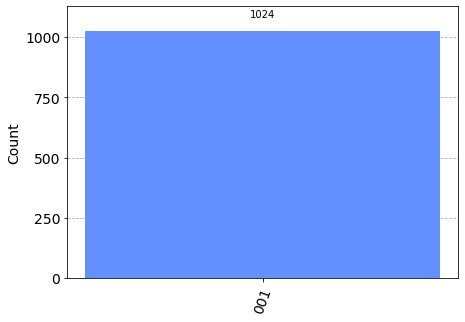

In [16]:
# Use local simulator
aer_sim = Aer.get_backend('aer_simulator')
# shots = 2000   # The default shots is 1024
results = aer_sim.run(qc).result()
answer = results.get_counts()

print(answer)

plot_histogram(answer)

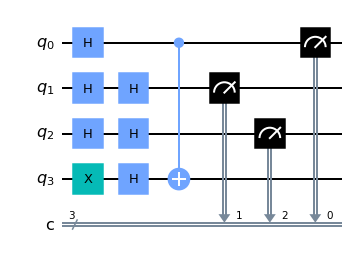

In [17]:
qc1 = QuantumCircuit(4,3)
qc1.h(0)
for i in range(1,3):
    qc1.h(i)
    qc1.h(i)
qc1.x(3)
qc1.h(3)
qc1.cnot(0,3)              #  After the CNOT operation, the q0 qubit goes to |-> state (before the CNOT, it was in |+> state)... Why? 
# qc1.z(0)
# qc1.h(0)
qc1.measure([i for i in range(3)], [j for j in range(3)])
qc1.draw()

The counts are:
 {'001': 522, '000': 502}


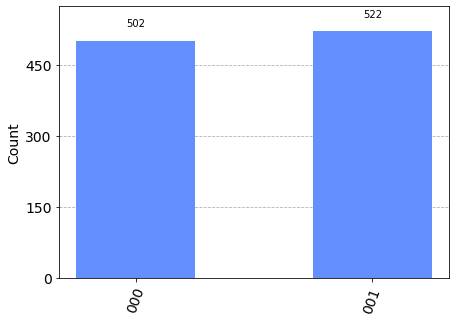

In [18]:
# Use local simulator
aer_sim1 = Aer.get_backend('aer_simulator')
# shots = 2000   # The default shots is 1024
results1 = aer_sim1.run(qc1).result()
answer1 = results1.get_counts()

print('The counts are:\n', answer1)

plot_histogram(answer1)

Enter the digits:  10101010110


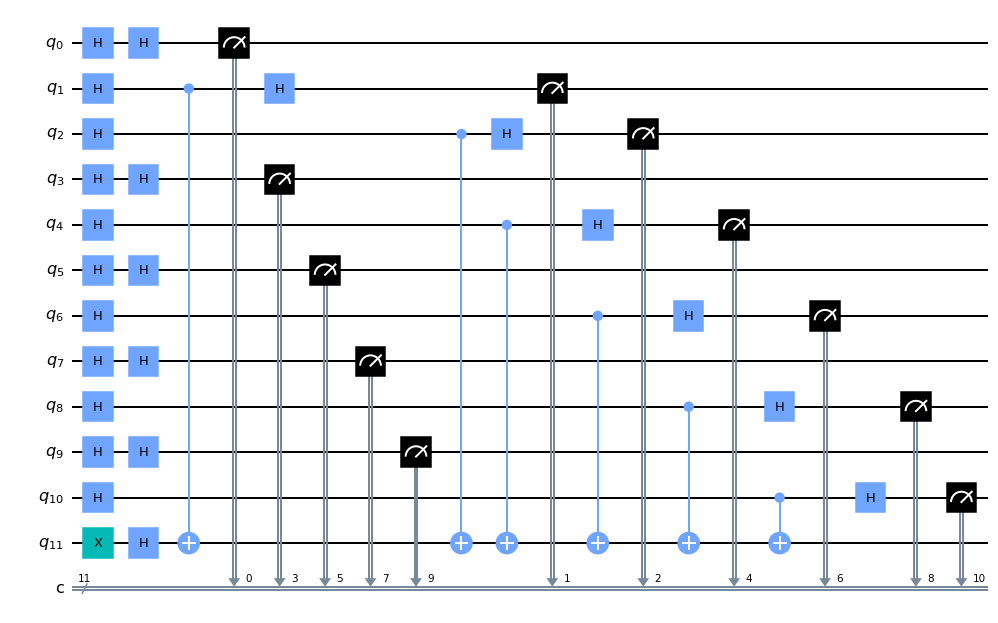

In [19]:
string_ = input("Enter the digits: ")
string_length = len(string_)

# while True:
#     for s in range(string_length):
#         if ((string_[s] == '1') or (string_[s] == '0')):
#             break
#         else:
#             print("Not valid! Try again.")
#             string_ = input("Enter the digits: ")

# Make a quantum circuit
qc = QuantumCircuit(string_length+1, string_length)

# Initialize each input qubit to apply a Hadamard gate and output qubit to |->

qc.x(string_length)
qc.h(string_length)

for i in range(string_length):
    qc.h(i)

# Apply an oracle for the given string
# Note: In Qiskit, numbers are assigned to the bits in a string from right to left

# qc.barrier()
string_ = string_[::-1]
for q in range(string_length):
    if string_[q] == '1':
        qc.cnot(control_qubit=q, target_qubit=string_length)
    else:
        # qc.i(q)
        continue
# qc.barrier()

# Apply Hadamard gates after querying the oracle
for i in range(string_length):
    qc.h(i)
# Measurement
qc.measure([i for i in range(string_length)], [i for i in range(string_length)])
qc.draw()

The counts are:
 {'10101010110': 1024}


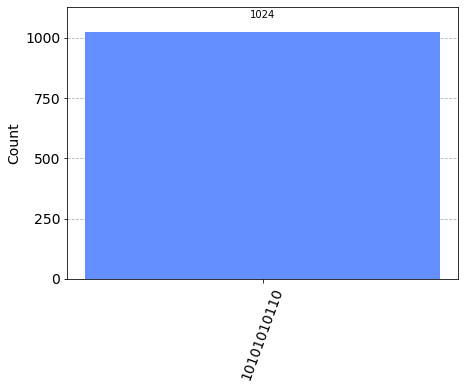

In [20]:
# Use local simulator
aer_sim1 = Aer.get_backend('aer_simulator')
# shots = 2000   # The default shots is 1024
results1 = aer_sim1.run(qc).result()
answer1 = results1.get_counts()

print('The counts are:\n', answer1)

plot_histogram(answer1)

If you see the result, you can see the hidden string "001" which we set at very first.

<a id="exercise1"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 1:</b> 
    
Let us build the Bernstein Vazirani function.
Note that there is only one parameter which will be a hidden string.
This string consists of "0" and "1".
In the below code block, you should build a function which works well in all general strings
to pass the grader.
    
</div>

In [21]:
def bernstein_vazirani(string):
    
    # Save the length of string
    string_length = len(string)
    
    # Make a quantum circuit
    qc = QuantumCircuit(string_length+1, string_length)
    
    # Initialize each input qubit to apply a Hadamard gate and output qubit to |->
    qc.x(string_length)
    qc.h(string_length)
    
    for i in range(string_length):
        qc.h(i)
    
    # Apply an oracle for the given string
    # Note: In Qiskit, numbers are assigned to the bits in a string from right to left
    string = string[::-1]
    for q in range(string_length):
        if (string[q] == '0'):
            # qc.i(q)    # Identity tranformation...
            continue
        else:
            qc.cnot(control_qubit=q, target_qubit=string_length)
    
    # Apply Hadamard gates after querying the oracle
    for i in range(string_length):
        qc.h(i)
    # Measurement
    qc.measure([i for i in range(string_length)], [i for i in range(string_length)])
    
#     display(qc.draw(output='mpl'))
    
#     backend= Aer.get_backend('aer_simulator')
#     result = backend.run(qc).result()
#     counts = result.get_counts()
#     display(plot_histogram(counts, color='magenta'))
    
    return qc

In [22]:
bernstein_vazirani('010101010011111101010')

In [23]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex1

grade_lab1_ex1(bernstein_vazirani) # Expected result type: function

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [24]:
my_circuit = bernstein_vazirani('10100101001110101')

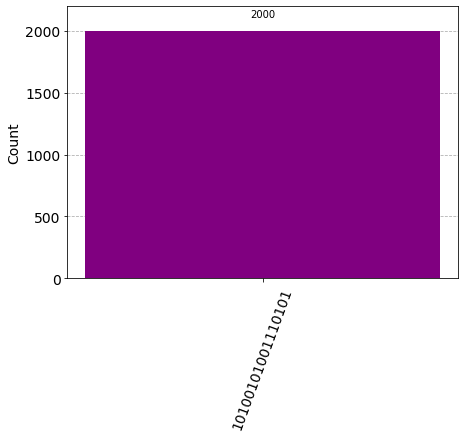

In [25]:
my_backend = Aer.get_backend('aer_simulator')
# my_results= my_backend.run(my_circuit).result()
my_results = execute(my_circuit, backend = my_backend, shots = 2000).result()
my_counts = my_results.get_counts()
plot_histogram(my_counts, color='purple')

In [26]:
# It's clear that this B-V algorithm re-produces our hidden bits perfectly!

Now, we shall call the function above to construct a Bernstein-Vazirani circuit as defined:

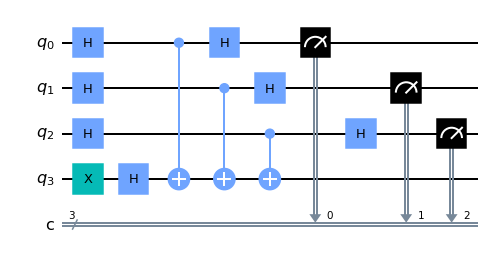

In [27]:
qc1 = bernstein_vazirani('111')
display(qc1.draw(output="mpl"))

Before executing this circuit, as mentioned, we can have multiple circuit calls and runs for a single Sampler session. We'll construct one more Bernstein-Vazirani circuit to demonstrate this.

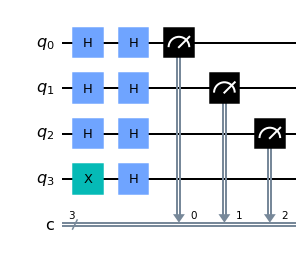

In [28]:
qc2 = bernstein_vazirani('000')
display(qc2.draw(output="mpl"))

In [255]:
[qc1, qc2]

### Using Runtime to run this circuit

There are essentially 3 steps before running any quantum circuit on Qiskit Runtime.

1. Set a backend for executing your routine.
2. Create a session constructor using `Session`.
3. Make instances with primitives inside the session; `Sampler` and `Estimator`.

First, let's set a backend to use. We shall be running our routines on the `ibmq_qasm_simulator` on cloud.

In [29]:
backend = service.backends(simulator=True)[0]
print(backend)

<IBMBackend('ibmq_qasm_simulator')>


Now let us build a session constructor here. We will make `Session` using `with` statement and define our `Sampler` instance to run our Bernstein-Vazirani circuits within this session. The `with` statement here denotes a context manager that is used to pass in the service that we previously defined as the initial parameter for the constructor. To submit a job with the Sampler, use `run` method specifying parameters within it. It requires you to pass in `circuits` which can be either a single circuit or a list of `QuantumCircuit`. The best feature of this structure is how quickly you can scale the number of circuits you pass by simply changing the list being passed to the `Sampler` run call.

In [30]:
options = Options(simulator={"seed_simulator": 42}, resilience_level=0) # Do not change values in simulator

For a consistent result, we will set a seed for `Sampler`. You can set the seed inside the `Sampler` object using `options` above. The example of how to use options with `Sampler` is right below:

In [31]:
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc1,qc2])

In [129]:
# job??

After running the sampler, it returns a `RuntimeJob` object and we can extract the results from this object using the `result` method to check the returned data. We can then pick our individual data of interest from this returned result. Details are here: **[RuntimeJob](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/stubs/qiskit_ibm_runtime.RuntimeJob.html#qiskit_ibm_runtime.RuntimeJob)**.

In [33]:
result = job.result()

In [34]:
result

SamplerResult(quasi_dists=[{7: 1.0}, {0: 1.0}], metadata=[{'header_metadata': {}, 'shots': 4000}, {'header_metadata': {}, 'shots': 4000}])

In [35]:
result.quasi_dists

[{7: 1.0}, {0: 1.0}]

This result has two results from each circuit. The hidden string of the first circuit `qc1` is `111` and the first result is 7 (7 in binary, 111). Its probability is 1.0 and it means the circuit returns 7 for 100% sure. In the same way, the second result is 0 (0 in binary, 000) and its probability is also 1.0.

As you see, the result is same as the bit string we passed while building the circuit. You may curious how it is possible. Let's take a look the image below:

![](https://qiskit.org/textbook/ch-gates/images/identities_1.svg)

There is a CNOT gate between four H-gates and it is same as a reversed CNOT gate. This is an example of kickback (or phase kickback) which is where the eigenvalue added by a gate to a qubit is *kicked back* into a different qubit via a controlled operation. It makes the Bernstein Vazirani circuit reveal the hidden bit string.

### Parameterized circuits

One of the major benefits of the primitives is the simplification of binding multiple parameters in parameterized circuits. To know more on how to bind parameters to a circuit and a few examples, check **[this tutorial linking to the section in Qiskit documentation](https://qiskit.org/documentation/tutorials/circuits_advanced/01_advanced_circuits.html#Parameterized-circuits)**. To see it, let's introduce another example of kickback with a controlled P-gate (phase gate). Here, we parametrise the **[P-gate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.PhaseGate.html)** with a rotation parameter `theta`:

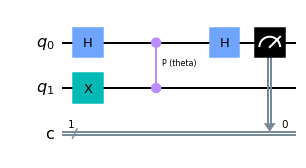

In [36]:
theta = Parameter('theta')
# theta ='theta'
# print(theta)
# type(theta)
qc = QuantumCircuit(2,1)
qc.x(1)
qc.h(0)
qc.cp(theta,0,1)
qc.h(0)
qc.measure(0,0)

qc.draw()

In [78]:
# theta??

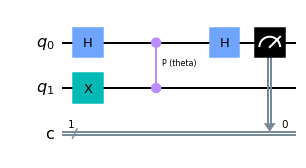

In [38]:
qc.draw()

The circuit shown above is parameterized, with the eigenvalue being kicked back into qubit 0 to be measured. The amount of kickback will be determined by the parameter theta. Now in the cell below, we shall define our parameters for our above circuit as a list. The parameters here will be from $0$ to $2\pi$ divided over 50 evenly spaced points.

Let's look at the controlled-phase gate circuits over different phases:

In [39]:
phases = np.linspace(0, 2*np.pi, 50) # Specify the range of parameters to look within 0 to 2pi with 50 different phases

# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]

In [40]:
len(individual_phases)

50

Before we apply this to our circuit above, let us visualize how it may look using the bloch sphere.

In [41]:
# help understanding of how its phase is moving
from qiskit.visualization import plot_bloch_multivector

states = []

for i in range(0, 50, 10):
    
    temp = QuantumCircuit(2,1)
    temp.x(1)
    temp.h(0)
    temp.cp(individual_phases[i][0],0,1)
    temp.h(0)
    
    state = Statevector(temp)
    states.append(state)

In [42]:
states

[Statevector([ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.00000000e+00+0.j,
              -2.23711432e-17+0.j],
             dims=(2, 2)),
 Statevector([0.        +0.j        , 0.        +0.j        ,
              0.64226379+0.47933393j, 0.35773621-0.47933393j],
             dims=(2, 2)),
 Statevector([0.        +0.j        , 0.        +0.j        ,
              0.08095595+0.27276745j, 0.91904405-0.27276745j],
             dims=(2, 2)),
 Statevector([0.        +0.j       , 0.        +0.j       ,
              0.11927702-0.3241142j, 0.88072298+0.3241142j],
             dims=(2, 2)),
 Statevector([0.        +0.j        , 0.        +0.j        ,
              0.70239167-0.45720631j, 0.29760833+0.45720631j],
             dims=(2, 2))]

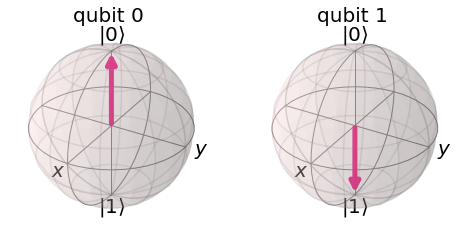

In [43]:
plot_bloch_multivector(states[0])

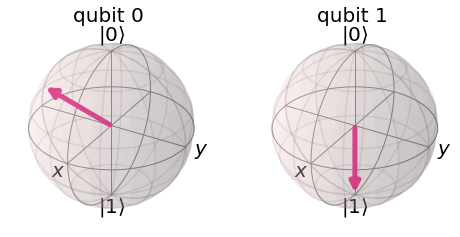

In [44]:
plot_bloch_multivector(states[1])

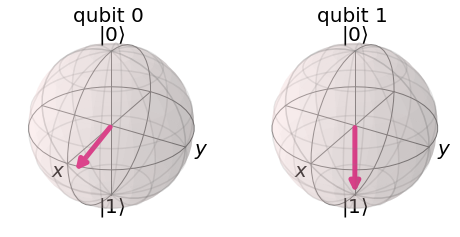

In [45]:
plot_bloch_multivector(states[2])

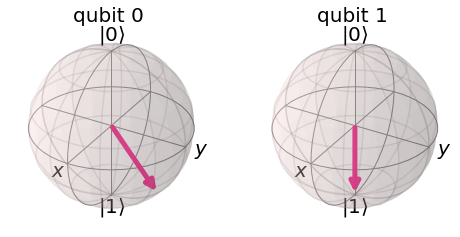

In [46]:
plot_bloch_multivector(states[3])

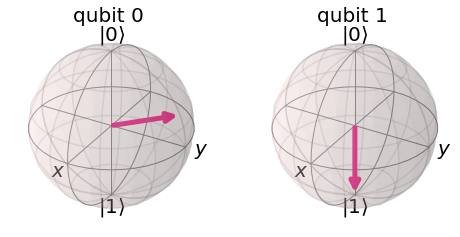

In [47]:
plot_bloch_multivector(states[4])

You can visualize how we see the rotations along the Y-Z axis as the state changes with each individual phase. Now let us apply the parameter list in our circuit `qc` in the following exercise.

<a id="exercise2"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 2:</b> 
    
Bind parameters to a parametrized circuit: List `individual_phases` to the `qc` circuit we made above using Sampler.
The answer type must be **[SamplerResult](https://qiskit.org/documentation/stubs/qiskit.primitives.SamplerResult.html)**.
    
</div>

Here we once again use the `Sampler` to run several circuits and bind the parameters to them.

When you make a `Sampler` object, please add the `options` parameter which is for the seed.

The `Sampler`'s run method has the following parameters:

>`circuits` – One or more circuit objects.  
>`parameter_values` – Parameters to be bound to the circuit.

Complete the code cell below to pass this exercise.

In [48]:
options = Options(simulator={"seed_simulator": 42}, resilience_level=0) # Do not change values in simulator

In [49]:
# individual_phases_reshaped = np.array(individual_phases).reshape((50,))
# my_parameters = list(individual_phases_reshaped)
# my_parameters

In [50]:
with Session(service=service, backend=backend):    
    sampler = Sampler(options = options)
    job = sampler.run(circuits = [qc]*len(individual_phases), parameter_values = individual_phases)
    result = job.result()

In [51]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex2

grade_lab1_ex2(result) # Expected result type: SamplerResult

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


The above code cell takes the parameterized circuit and runs it on a backend using the Runtime service. This routine binds each parameter to the circuit defined and executes all the resulting circuits to give us the collective result.

Let's now plot the result we obtained vs what we can infer theoretically! Grab the quasi distributions for the probability of being in the 1 state for each of these circuits. Each circuit will have different theta values as phase parameters. 

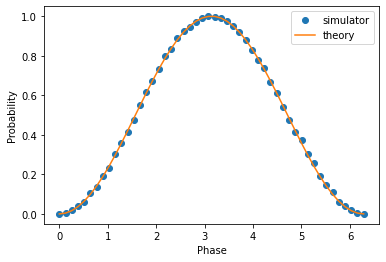

In [52]:
# The probablity of being in the 1 state for each of these values
prob_values = [dist.get(1, 0) for dist in result.quasi_dists]

plt.plot(phases, prob_values, 'o', label='simulator')
plt.plot(phases, np.sin(phases/2,)**2, label='theory')
plt.xlabel('Phase')
plt.ylabel('Probability')
plt.legend();

In [53]:
print(phases)

[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531]


The yellow line is the theoretically expected result whereas the blue dots are the values we get from running it on the backend. As you can see it is mostly aligned with the theory and there are slight deviations to the curve in the resulting distribution due to the  slight inherent randomness of the `ibmq_qasm_simulator`.

We looked at the quasiprobability-distributions so far but we can also take a look at this in terms of evaluating expectation values.

# Section 3.2: Example using Estimator

The Estimator gives you the calculated and interpreted expectation values of quantum operators. The Estimator requires that you have the circuit with 'no measurements'. The reason why is that in running algorithms like VQE, the Estimator will bind single-qubit rotations to get your hamiltonians so we cannot have measurements.

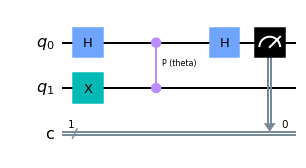

In [54]:
display(qc.draw())

Currently the circuit `qc` has measurements so we will remove these with `remove_final_measurements`.

In [55]:
qc_no_meas = qc.remove_final_measurements(inplace=False)

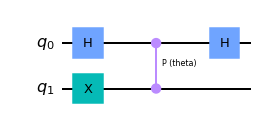

In [56]:
display(qc_no_meas.draw())

To calculate its expectation value, we need to set an observable for the circuit. In this case, we will use 'ZZ' observable. Note that the length of the observable is same as the number of qubits in the circuit.

In [57]:
ZZ = SparsePauliOp.from_list([("ZZ", 1)])

The expectation value is calculated by the equation below.

$$
\langle ZZ\rangle =\langle \psi | ZZ | \psi\rangle=\langle \psi|(|0\rangle\langle 0| -|1\rangle\langle 1|)\otimes(|0\rangle\langle 0| - |1\rangle\langle 1|) |\psi\rangle =|\langle 00|\psi\rangle|^2 - |\langle 01 | \psi\rangle|^2 - |\langle 10 | \psi\rangle|^2 + |\langle 11|\psi\rangle|^2
$$

Highly recommend to execute the next cell after looking closely at the above expression.

In [58]:
options = Options(simulator={"seed_simulator": 42}, resilience_level=0)

with Session(service=service, backend=backend):
    estimator = Estimator(options=options)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))

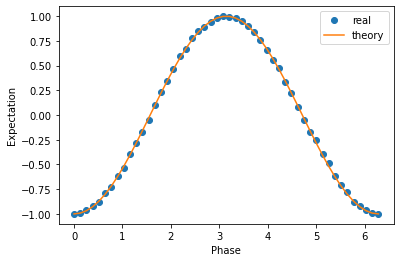

In [59]:
param_results = job.result()
exp_values = param_results.values

plt.plot(phases, exp_values, 'o', label='real')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend();

### Hamiltonian explained

One of the interesting uses of Estimator is that it could be especially used for calculating hamiltonians with respect to observables.

A hamiltonian is a quantum mechanical operator and it has the total energy information inside a system including kinetic and potential energy. This is the reason why is that we need to calculate it. If you can compute its energy value, you can find its energy in nature or its cost in machine learning. It can be said to find the ground state and excited states, so
it is closely related to quantum physics, quantum chemistry, and quantum machine learning!

To calculate hamiltonians, the parametrized circuit is need. It is easy to make a random parametrized circuit if you use **[RealAmplitudes](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html)**. The example code is below.

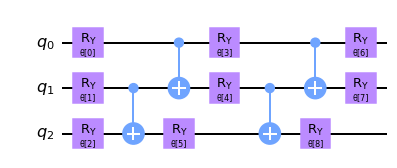

In [60]:
ansatz = RealAmplitudes(3, reps=2)  # create the circuit on 3 qubits
ansatz.decompose().draw("mpl")

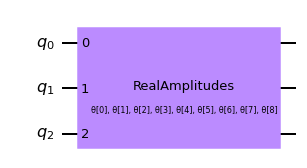

In [61]:
ansatz.draw()

In [62]:
print(ansatz)

     ┌───────────────────────────────────────────────────────────────┐
q_0: ┤0                                                              ├
     │                                                               │
q_1: ┤1 RealAmplitudes(θ[0],θ[1],θ[2],θ[3],θ[4],θ[5],θ[6],θ[7],θ[8]) ├
     │                                                               │
q_2: ┤2                                                              ├
     └───────────────────────────────────────────────────────────────┘


In [79]:
# RealAmplitudes??

In [113]:
H = SparsePauliOp.from_sparse_list([('XZ', [0,2], 6), ('YY', [0,1], 2)], num_qubits=3)
p = 3*(2+1)
param = np.linspace(0,1,p)
param = list(param)
my_parameters = [param]*p

In [109]:
H

SparsePauliOp(['ZIX', 'IYY'],
              coeffs=[6.+0.j, 2.+0.j])

In [114]:
with Session(service=service, backend=backend):
    options1 = Options(simulator={"seed_simulator": 42}, resilience_level=0)
    estimator1 = Estimator(options = options1)
    job1 = estimator1.run(circuits=[ansatz]*p, observables=[H]*p, parameter_values=my_parameters)
    result1 = job1.result()

In [115]:
result1

EstimatorResult(values=array([-2.53 , -2.542, -2.503, -2.379, -2.348, -2.396, -2.394, -2.483,
       -2.454]), metadata=[{'variance': 36.077147999999994, 'shots': 4000}, {'variance': 35.895275999999996, 'shots': 4000}, {'variance': 36.126951, 'shots': 4000}, {'variance': 36.590215, 'shots': 4000}, {'variance': 36.668856, 'shots': 4000}, {'variance': 36.447480000000006, 'shots': 4000}, {'variance': 36.456934, 'shots': 4000}, {'variance': 36.060615000000006, 'shots': 4000}, {'variance': 36.261724, 'shots': 4000}])

In [117]:
result1??

Type:        EstimatorResult
String form:
EstimatorResult(values=array([-2.53 , -2.542, -2.503, -2.379, -2.348, -2.396, -2.394, -2.483,
       -2.454]), metadata=[{'variance': 36.077147999999994, 'shots': 4000}, {'variance': 35.895275999999996, 'shots': 4000}, {'variance': 36.126951, 'shots': 4000}, {'variance': 36.590215, 'shots': 4000}, {'variance': 36.668856, 'shots': 4000}, {'variance': 36.447480000000006, 'shots': 4000}, {'variance': 36.456934, 'shots': 4000}, {'variance': 36.060615000000006, 'shots': 4000}, {'variance': 36.261724, 'shots': 4000}])
File:        /opt/conda/lib/python3.8/site-packages/qiskit/primitives/base/estimator_result.py
Source:     
class EstimatorResult(BasePrimitiveResult):
    """Result of Estimator.

    .. code-block:: python

        result = estimator.run(circuits, observables, params).result()

    where the i-th elements of ``result`` correspond to the circuit and observable given by
    ``circuits[i]``, ``observables[i]``, and the parameter values b

In [119]:
values = result1.values
values

array([-2.53 , -2.542, -2.503, -2.379, -2.348, -2.396, -2.394, -2.483,
       -2.454])

In [121]:
metadata = result1.metadata
metadata

[{'variance': 36.077147999999994, 'shots': 4000},
 {'variance': 35.895275999999996, 'shots': 4000},
 {'variance': 36.126951, 'shots': 4000},
 {'variance': 36.590215, 'shots': 4000},
 {'variance': 36.668856, 'shots': 4000},
 {'variance': 36.447480000000006, 'shots': 4000},
 {'variance': 36.456934, 'shots': 4000},
 {'variance': 36.060615000000006, 'shots': 4000},
 {'variance': 36.261724, 'shots': 4000}]

In [122]:
print("Min expectation value: %f"% min(values))
print("Max expectation value: %f"% max(values))

Min expectation value: -2.542000
Max expectation value: -2.348000


This `ansatz` is the circuit on 3 qubits and `reps` is 2. In this case, the total number of parameters is $3 \times (2+1) = 9$.

<a id="exercise3"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 3:</b> 
    
Build an Estimator routine to compute the expectation values of custom Hamiltonians with respect to certain observables. The final result must be **[EstimatorResult](https://qiskit.org/documentation/stubs/qiskit.primitives.EstimatorResult.html)**.
    
The main obejct is to compute $ \langle \psi_1(\theta) \lvert H_1 \lvert \psi_1(\theta)\rangle$, $ \langle \psi_2(\theta) \lvert H_2 \lvert \psi_2(\theta)\rangle$, and $ \langle \psi_3(\theta) \lvert H_3 \lvert \psi_3(\theta)\rangle$ and all the circuits consist of **5 qubits**.
    
1. Make three random circuits using **[RealAmplitudes](https://qiskit.org/documentation/stubs/qiskit.circuit.library.RealAmplitudes.html)**; $ \psi_1(\theta) $ for reps = 2, $ \psi_2(\theta) $  for reps = 3, and $ \psi_3(\theta) $  for reps = 4.
2. Make hamiltonians using **[SparsePauliOp](https://qiskit.org/documentation/stubs/qiskit.quantum_info.SparsePauliOp.html)**:
    - $ H_1 = X_1Z_2 + 3Y_0Y_4 $
    - $ H_2 = 2X_3 $
    - $ H_3 = 3Y_2 + 5Z_1X_3 $
3. Make a list of evenly spaced values for theta between 0 and 1 using **[numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)**. Note that the number of parameters is different for `reps` of each circuit.
4. Use the Estimator with `options` defined in the cell to calculate each expectation value
    
</div>

In [65]:
# Make three random circuits using RealAmplitudes

psi1 = RealAmplitudes(num_qubits=5, reps=2)
psi2 = RealAmplitudes(num_qubits=5, reps=3)
psi3 = RealAmplitudes(num_qubits=5, reps=4)


In [70]:
# SparsePauliOp.from_list??

In [69]:
# SparsePauliOp??

In [91]:
# Make hamiltonians using SparsePauliOp

H1 = SparsePauliOp.from_sparse_list([('XZ', [1,2], 1), ('YY', [0,4], 3)], num_qubits=5)
H2 = SparsePauliOp.from_sparse_list([('X', [3], 2)], num_qubits=5)
H3 = SparsePauliOp.from_sparse_list([('Y', [2], 3), ('ZX', [1,3], 5)], num_qubits=5)


In [82]:
p1 = 5*(2+1)  # No of parameters for reps=2
p2 = 5*(3+1)  # No of parameters for reps=3
p3 = 5*(4+1)  # No of parameters for reps=4

print(p1)
print(p2)
print(p3)

15
20
25


In [84]:
# Make a list of evenly spaced values for theta between 0 and 1

theta1 = np.linspace(0,1,p1)
theta2 = np.linspace(0,1,p2)
theta3 = np.linspace(0,1,p3)


In [93]:
# Use the Estimator to calculate each expectation value

with Session(service=service, backend=backend):
    
    options = Options(simulator={"seed_simulator": 42}, resilience_level=0) # Do not change values in simulator
    
    estimator = Estimator(options=options)
    
    # calculate [ <psi1(theta1)|H1|psi1(theta1)>,
    #             <psi2(theta2)|H2|psi2(theta2)>,
    #             <psi3(theta3)|H3|psi3(theta3)> ]
    # Note: Please keep the order
    job = estimator.run(circuits= [psi1, psi2, psi3], parameter_values=[theta1, theta2, theta3], observables=[H1, H2, H3])    
    
    result = job.result()

In [94]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex3

grade_lab1_ex3(result) # Expected result type: EstimatorResult

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


# Part IV: Introduction to Error Mitigation and Error Suppression on Qiskit Runtime 

As we mentioned previously, Qiskit Runtime service has Error mitigation and Error suppression routines available and implemented for obtaining increased quality of information obtained.

In the current era, quantum computers are affected by **noise**. To reduce or remedy the effects of noise and decoherence in quantum computing, error correction is something that is usually accepted as an approach to try to negate the effects of these noise effects completely on an encoding level. While effective, these error correction protocols are very demanding in requiring a huge overhead of both quantum and classical resources to implement the error correcting codes so as to achieve a fault tolerant system of computation.

Now this overhead is something that is not practically feasible in the current NISQ era of systems by limitations such as the number of qubits, controlled error rates, extra circuit depth and measurements introduced. So what we can do for now is instead of completely eliminating it using a huge amount of resources, we aim to **reduce** its effects with a much smaller overhead. These techniques are called error mitigation and error suppression, which are a series of modern techniques that focus on reducing the errors caused by the hardware, not completely removing it. **[Here is a blog article](https://research.ibm.com/blog/quantum-error-suppression-mitigation-correction)** on IBM Research blog that gives a clear explanation on the distinction of these concepts. 

The Qiskit Runtime service has many leading and well known error mitigation and error suppression strategies which come built into the service. They also have integration with the primitive model which can be switched on using an abstracted layer available to us, allowing for activation and deactivation as we please!

For the first example of these techniques, we will be introducing an error mitigation method on Qiskit Runtime: M3 on Sampler.

# 4.1 Error Mitigation with Sampler

With `Sampler` you can leverage the **[M3 Error mitigation routine](https://arxiv.org/pdf/2108.12518.pdf)** for obtaining better information quality. In general, error mitigation strategies can be turned on using the `resilience_level` parameter with some additional options as per the strategy.

To activate M3 you can set `resilience_level=1` in `Options`, to apply M3 to your run. Let us look at a demonstration of the same.

### M3

In the canonical situation where initialization noise is minimal, measurement errors over $N$ qubits can be treated classically and satisfy

$$ \vec{p}_{noisy} = A\vec{p}_{ideal} $$

where $\vec{p}_{noisy}$ is a vector of noisy probabilities returned by the quantum system, $\vec{p}_{ideal}$ is the probabilities in the absence of measurement errors, and $A_{row,col}$ is the $2^N \times 2^N$ complete assignment matrix, where each element in $A$ is the probability of bit string $col$ being converted to bit string $row$ by the measurement-error process. While computing $A$ requires executing $2^N$ circuits, it is often the case that errors on multiple qubits can be well approximated using at most $\mathcal{O}(N)$ calibration circuits. **[[1]](https://arxiv.org/pdf/2108.12518.pdf)**

M3 is a package for scalable quantum measurement error mitigation that need not explicitly form the assignment matrix, or its inverse, as is thus a matrix-free measurement mitigation (M3) routine.

![truncation](https://qiskit.org/documentation/partners/mthree/_images/truncation.png)

M3 works in a reduced subspace defined by the noisy input bitstrings that are to be corrected. Because the number of unique bitstrings can be much smaller than the dimensionality of the full multi-qubit Hilbert space, the resulting linear system of equations is nominally much easier to solve.

$$ (\tilde{A})^{-1}\tilde{A}\vec{p}_{ideal} = (\tilde{A})^{-1}\vec{p}_{noisy} $$

It is often the case that this linear equation is trivial to solve using LU decomposition, using only modest computing resources. However, if the number of unique bistrings is large, and / or one has very tight memory constraints, then the problem can be solved in a matrix-free manner using a preconditioned iterative linear solution method, e.g. the Generalized minimal residual (GMRES) or biconjugate gradient stabilized (BiCGSTAB) methods. **[[2]](https://qiskit.org/documentation/partners/mthree/index.html)**

## Running on noisy simulators

We'll use a noisy simulator to see how this error mitigation technique works. To simulate a noisy scenario on our simulators, we shall pass a noise model to `ibmq_qasm_simulator`. We shall proceed by creating a noise model with a `FakeBackend` from `fake_provider` and pass it as a `simulator` option parameter.

Fake backends are built to mimic the behaviors of IBM Quantum systems using system snapshots. The system snapshots contain important information about the quantum system such as coupling map, basis gates, qubit properties (T1, T2, error rate, etc.) which are useful for performing noisy simulation of the system. **[[3]](https://qiskit.org/documentation/apidoc/providers_fake_provider.html)**

To represent our run options, we will define an instance of the `Options` class with relevant parameters to define our defaults for each run.

Here we will define two sets of `Options`. Here, `options` with just the noise_model will represent a normal run without error mitigation and `options_with_em` with `resilience_level` option set to `1` will denote a run with error mitigation active. After you create it, you can add this when you instantiate your `Sampler` object

You can check how to make the `Options` instance in the below.

In [135]:
from qiskit.providers.fake_provider import FakeManila
from qiskit_aer.noise import NoiseModel

# Import FakeBackend
fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

# Set options to include noise_model
options = Options(simulator={
    "noise_model": noise_model,
    "seed_simulator": 42,
}, resilience_level=0)

# Set options to include noise_model and resilience_level
options_with_em = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 42,
    },  
    resilience_level=1
)

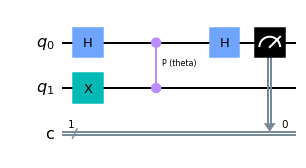

In [136]:
qc.draw()

In Sampler, M3 is activated when you set the resilience level as 1. Let's execute the code below and see how much this technique is effective.

In [137]:
with Session(service=service, backend=backend):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results = job.result()
    prob_values = [1-dist[0] for dist in param_results.quasi_dists]
    
    sampler1 = Sampler(options=options_with_em)
    job1 = sampler1.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results1 = job1.result()
    prob_values_with_em = [1-dist[0] for dist in param_results1.quasi_dists]

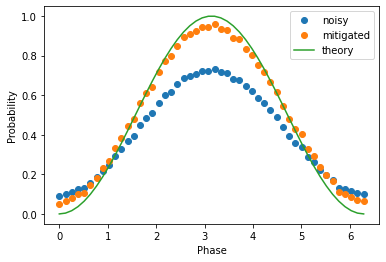

In [138]:
plt.plot(phases, prob_values, 'o', label='noisy')
plt.plot(phases, prob_values_with_em, 'o', label='mitigated')
plt.plot(phases, np.sin(phases/2,)**2, label='theory')
plt.xlabel('Phase')
plt.ylabel('Probability')
plt.legend();

### DD

Dynamic decoupling (DD) is used to increase the lifetime of quantum information. 

If a qubit is idle, it becomes noisy because of decoherence, leaking information to surroundings. To prevent this idle state, we effectively disconnect the environment using so-called decoupling methods; scan the circuit for idle periods of time (i.e. those containing delay instructions) and insert a DD sequence of gates in those spots. These gates amount to the identity, so do not alter the logical action of the circuit, but have the effect of mitigating decoherence in those idle periods. However, this technique may not better the situation if you do not use a proper DD sequence because the pulses have finite lengths and do not implement perfect rotations. As a result, it is important to have an optimal decoupling sequence which does not destroy the qubit coherence instead of preserving it. 

![DD circuit](https://qiskit.org/documentation/_images/qiskit.transpiler.passes.DynamicalDecoupling_1_0.png)

In the above circuit you can see X gates are there which is in the idle moment. Applying X-gate twice is equal to an identity gate so there is no change logically.

See detail about DD **[here](https://qiskit.org/documentation/stubs/qiskit.transpiler.passes.DynamicalDecoupling.html)**. Note that **this feature is enabled by default on Qiskit Runtime**.

# 4.2 Error Mitigation with Estimator

While Sampler currently showcases M3 as its error mitigation strategy, with Estimator, you can activate multiple error mitigation strategies. Currently you can enable **Twirled Readout Error eXtinction (T-REX)**, **Digital Zero-noise Extrapolation (ZNE)** and **Probabilistic Error Cancellation (PEC)** available to you as `resilience_level` in the `Options` parameters. We shall be looking into T-REX as a demonstration in this notebook and add in an optional section if you wish to play around with other resilience levels.

### T-Rex

T-REX stands for **Twirled Readout Error eXtinction** which is an implementation which involves "twirling" of gates. If we were to view noise as a set of extra probabilistic gates on top of our perfect circuit implementation, twirling is something that can be considered in the sense that every time we execute the circuit, we conjugate this noisy gate set with a gate randomly chosen from a set of gates called as a "twirling set". If we are to choose this gate set to be a set of Pauli operators, we can term this as "Pauli twirling: which is one of the most commonly used twirling techniques available.

Pauli twirling is a form of randomized compiling that inserts pairs of Pauli gates (I, X, Y, Z) before and after entangling gates such that the overall unitary is the same, but the way it is implemented is different. This has the effect of turning coherent errors into stochastic errors, which can then be eliminated by sufficient averaging. This is done a number of times for the benefit of averaging. Note: we may not use a sufficient basis set to currently cancel all errors. **[[4]](https://github.com/qiskit-research/qiskit-research/blob/main/docs/getting_started.ipynb)**

You can use activate T-REX on `Estimator` by setting `resilience_level=1` in options. T-REX will be active by default on runtime if no `resilience_level` is being specified.

Using an Estimator, you can also consider Digital ZNE as one of the options you can choose for applying error mitigation.

### Digital ZNE (Zero Noise Extrapolation)

Digital Zero Noise Extrapolation (ZNE) is a popular technique for mitigating errors in noisy quantum computers without the need for additional quantum resources. A quantum program is altered to run at different effect levels of processor noise. The result of the computation is extrapolated to an estimated value at a noiseless level.

To find the proper value, Digital ZNE firstly scales noise as explained above. There are two kinds of methods for scaling it: analog and digital. You can check the detailed description of each method below. It is still an active research question around which method is the best to use. Note that the digital way is by not acting on the physical quantum pulses.

- Pulse stretching (analog): Applying the same one stretched along a larger amount of time for a circuit - take physical pulses and stretch it in time. In principle its the same circuit - but you are increasing the effective noise. **[[5]](https://arxiv.org/pdf/1612.02058.pdf)**
- Local folding (digital): Compiling the input circuit with a larger number of gates. Each gate $G$ is replaced by $G$, $G^\dagger$, $G$. If you are on a simulator, you do nothing to the circuit. If you use a real device, you can see the increasing noise.
- Global folding (digital): Working the same way as local folding - but instead you apply this trick to the full circuit.

Qiskit runtime currently has an implementation of Digital ZNE which you can activate it by setting the `resilience level` to `2`.

In [140]:
# Set options to activate T-Rex Error Mitigation module
options_with_em = Options(
    simulator={
        "noise_model": noise_model,
        "seed_simulator": 42,
    },  
    resilience_level=1 # You may change the value here. resilience_level = 1 will activate TREX
)

In [141]:
with Session(service=service, backend=backend):    
    estimator = Estimator(options=options)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results = job.result()
    exp_values = param_results.values
    
    estimator1 = Estimator(options=options_with_em)
    job1 = estimator1.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results1 = job1.result()
    exp_values_with_em = param_results1.values

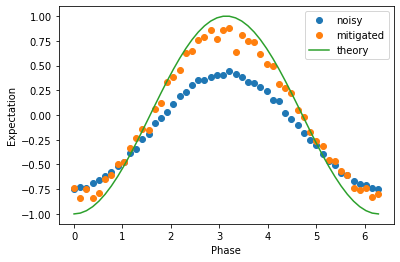

In [142]:
# T-REX error-mitigation routine
plt.plot(phases, exp_values, 'o', label='noisy')
plt.plot(phases, exp_values_with_em, 'o', label='mitigated')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend();

You may notice that the result may change every run when selecting T-REX. This is because the gate set selected for twirling is different everytime which contributes to the random characteristics observed in the result.

In [158]:
options_with_em_1 = Options(
    simulator = {
        'noise_model' : noise_model,
        'seed_simulator' : 42
    }, 
    resilience_level = 2     # 2 activates ZNE error-mitigation routine (just like value set to 1 acivated T-REX error-mitigation routine in the previous cell)
)

In [159]:
with Session(service=service, backend = backend):
    estimator2 = Estimator(options= options_with_em_1)
    job2 = estimator2.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(individual_phases))
    param_results2 = job2.result()
    exp_values_with_em_1 = param_results2.values

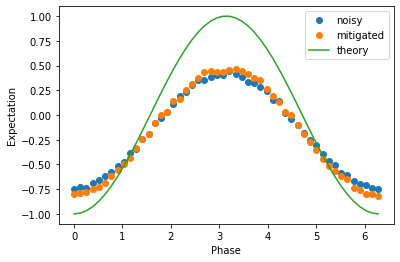

In [160]:
# ZNE error-mitigation routine
plt.plot(phases, exp_values, 'o', label='noisy')
plt.plot(phases, exp_values_with_em_1, 'o', label='mitigated')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend();

In [ ]:
options_with_em_2 = Options(
    simulator = {
        'noise_model' : noise_model,
        'seed_simulator' : 42
    }, 
    resilience_level = 3     # 3 activates PEC error-mitigation routine
)

In [ ]:
with Session(service = service, backend = backend):
    estimator3 = Estimator(options = options_with_em_2)
    job3 = estimator3.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables = [ZZ]*len(individual_phases))
    param_results3 = job3.result()
    exp_values_with_em_2 = param_results3.values

In [ ]:
# PEC error-mitigation routine
plt.plot(phases, exp_values, 'o', label='noisy')
plt.plot(phases, exp_values_with_em_2, 'o', label='mitigated')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend();

### Optional: Higher resilience levels (beta)

The resilience level in Qiskit runtime is a metric to specify how much resilience to build against errors. Higher levels generate more accurate results, at the expense of longer processing times. You can also activate higher levels of resilience on Qiskit runtime but please do note that **this feature is currently in beta** and the results may not be as expected, but feel free to experiment with them if you wish!

- `resilience_level=2` leverages **Zero Noise Extrapolation method (ZNE)** which computes an expectation value of the observable for different noise factors (amplification stage) and then uses the measured expectation values to infer the ideal expectation value at the zero-noise limit (extrapolation stage). This approach tends to reduce errors in expectation values, but is not guaranteed to produce an unbiased result.
- `resilience_level=3` Level 3 enables the **Probabilistic Error Cancellation (PEC)** method. This approach mitigates error by learning and inverting a sparse noise model that is able to capture correlated noise. PEC returns an unbiased estimate of an expectation value so long as learned noise model faithfully represents the actual noise model at the time of mitigation. 

The Qiskit Runtime primitive implementation of PEC specifically addresses noise in self-inverse two-qubit gates, so it first stratifies each input circuit into an alternating sequence of simultaneous 1-qubit gates followed by a layer of simultaneous 2-qubit gates. Then it learns the noise model associated with each unique 2-qubit gate layer. **It is recommended to start with short depth circuits** to get a feel for the scaling of the sampling overhead of PEC prior to attempting larger problems.

For more information on the specifics of these options, please check the [**release note here**](https://github.com/Qiskit/qiskit-ibm-runtime/blob/ab7486d6837652d54cb60b83cfaa9165f5d0484c/docs/how_to/error-mitigation.rst#advanced-resilience-options) for the configuration.

<div class="alert alert-block alert-info">
    
<b>Optional: Run the above on a real backend</b>

Feel free to test the above code on a **real quantum backend** to see how the result varies when running on a QPU. For this challenge, you will have a `hub`, `group`, and `project` allocated to you. Feel free to configure the cell below and experiment with the results!
    
</div> 

# 4.3 (Optional) Error Mitigation with Real Backends

Time to configure a **real backend**! To configure, let's first set the provider for the challenge. Note that this is ungraded and completely optional. Feel free to have fun with expoloring the error mitigation and suppression strategies on real backends!

In [161]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main') # Change according to the email provided

In [162]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

Among these backends we will choose a least busy real backend for the fastest execution. Feel free to assign a particular one if you wish!

In [163]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))

In [169]:
backend.name()

'ibmq_quito'

Using the real backend on the `Sampler` first: 

In [164]:
options = Options(resilience_level=0) 
options_with_em = Options(resilience_level=1) 

In [174]:
with Session(service=service, backend=backend.name()):
    sampler = Sampler(options=options)
    job = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results = job.result()
    prob_values = [1-dist[0] for dist in param_results.quasi_dists]
    
    sampler_1 = Sampler(options=options_with_em)
    job_1 = sampler.run(circuits=[qc]*len(phases), parameter_values=individual_phases)
    param_results_1 = job.result()
    prob_values_with_em1_1 = [1-dist[0] for dist in param_results.quasi_dists]

KeyboardInterrupt: 

In [ ]:
plt.plot(phases, prob_values, 'o', label='noisy')
plt.plot(phases, prob_values_with_em1_1, 'o', label='mitigated')
plt.plot(phases, np.sin(phases/2,)**2, label='theory')
plt.xlabel('Phase')
plt.ylabel('Probability')
plt.legend();

Using the real backend for `Estimator`:

In [175]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: not x.configuration().simulator))

In [176]:
options_with_em = Options(resilience_level=2) # Change to see difference

In [177]:
with Session(service=service, backend=backend.name()):    
    estimator = Estimator(options=options)
    job = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results = job.result()
    exp_values = param_results.values
    
    estimator1 = Estimator(options=options_with_em)
    job1 = estimator.run(circuits=[qc_no_meas]*len(phases), parameter_values=individual_phases, observables=[ZZ]*len(phases))
    param_results1 = job.result()
    exp_values_with_em1_1 = param_results1.values

KeyboardInterrupt: 

In [ ]:
plt.plot(phases, exp_values, 'o', label='noisy')
plt.plot(phases, exp_values_with_em, 'o', label='mitigated')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend();

Now, it's time for a **quick trivia question!** 

<a id="exercise4"></a>

<div class="alert alert-block alert-success">
    
<b> Exercise 4:</b> 
    
**Choose the correct statements from the following list**. Multiple answer selections are allowed.

1. Error correction is equal to error mitigation.
2. If you want to apply X-gate for DD, applying only twice is possible.
3. It is important to have an optimum decoupling sequence for DD.
4. M3 is for quantum measurement error mitigation.
5. Using M3, you should set the resilience level as 2.
6. T-rex changes coherent errors into stochastic errors.
7. ZNE is an error correction technique and is used for fault-tolerant QC.
8. ZNE amplifies the scale factor of noise to estimate the measured value in the absence of noise.
9. Global folding is an analog method of physically stretching a quantum pulse.
10. With ZNE, all errors can be mitigated.

The answer must be a **list with integers** denoting the option numbers. If you think all the sentences are wrong, you can just pass an empty list.
    
</div>

In [180]:
answer = [3, 4, 6, 8] # Why is 8th point correct? Think about it...

In [181]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex4
 
grade_lab1_ex4(answer) # Expected result type: List

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


# Part V: Example Using Both Primitives - Unscrambling the message!

Following our story, we shall now leverage our learning above to **unscramble the strange message** we received on our comms and get to the bottom of this mystery. Whether the message is displayed clearly or not depends on **how noisy the outcome is!**

<a id="exercise5"></a>
<div class="alert alert-block alert-success">
    
<b> Exercise 5:</b> 
    
Let's apply error mitigation to the noisy transmission to figure out the hidden message!
    
The answer must be a **list** which contains a [**SamplerResult**](https://qiskit.org/documentation/stubs/qiskit.primitives.SamplerResult.html) **object** and a **list of four** [**EstimatorResult**](https://qiskit.org/documentation/stubs/qiskit.primitives.EstimatorResult.html) **objects**.
    
1. For SamplerResult, you make a **Bernstein-Vazirani** circuit with the hidden bitstring, "11111" to execute. You can use the previously built routines to do so.
    
2. For EstimatorResult, build a circuit for $S_1$ to demonstrate the violation of the **CHSH inequality**.
    
</div>

## The CHSH inequality

The CHSH inequality, named after the authors Clauser, Horne, Shimony, and Holt, is used to experimentally prove Bell's theorem. (And Clauser is one of Nobel Physics Prize winners in 2022!) This theorem asserts that local hidden variable theories cannot account for some consequences of entanglement in quantum mechanics.

For this experiment, we will create an entangled pair on which we measure each qubit on two different bases. We will label the bases for the first qubit $A$ and $a$ and the bases for the second qubit $B$ and $b$. This allows us to compute the CHSH quantities $S_1$ and $S_2$:

$$S_1 = A(B-b) + a(B+b)$$
 
Each observable is either $+1$ or $-1$. Clearly, one of the terms $B\pm b$ must be $0$, and the other must be $\pm 2$.  Therefore, $S_1 = \pm 2$. The average value of $S_1$ must satisfy the inequality:
    
$$|\langle S_1 \rangle| = |\langle AB \rangle - \langle Ab \rangle + \langle aB \rangle + \langle ab \rangle| \leq 2$$
    
As the same way, $S_2$ and its inequality are defined as the below.

$$S_2 = A(B+b) - a(B-b)$$
    
$$|\langle S_2 \rangle| = |\langle AB \rangle + \langle Ab \rangle - \langle aB \rangle + \langle ab \rangle| \leq 2$$

However, if you calculate the expectation values of CHSH quantities, you can see some values are over 2:  $|\langle S_1 \rangle| > 2$ or $|\langle S_2 \rangle| > 2$, which demonstrates the violation of the CHSH inequality. You can check more details of CHSH inequality in the Qiskit Textbook **[here](https://qiskit.org/textbook/ch-demos/chsh.html)**!

### Task for `estimator_result`

Build a circuit for $S_1$ as shown above to demonstrates the violation of the CHSH inequality. The circuit is built with bell’s circuit of H-gate and CNOT-gate, and Rotation-Y gate with parameter theta on the first qubit. You can see how the circuit looks in the below figure.

A list `estimator_result` will have **four different EstimatorResult objects** each with the respective observables $Z_{0}Z_{1}$, $X_{0}Z_{1}$, $Z_{0}X_{1}$, and $X_{0}X_{1}$ passed separately in each run. Use the phases as defined below and complete the routine to pass the exercise.

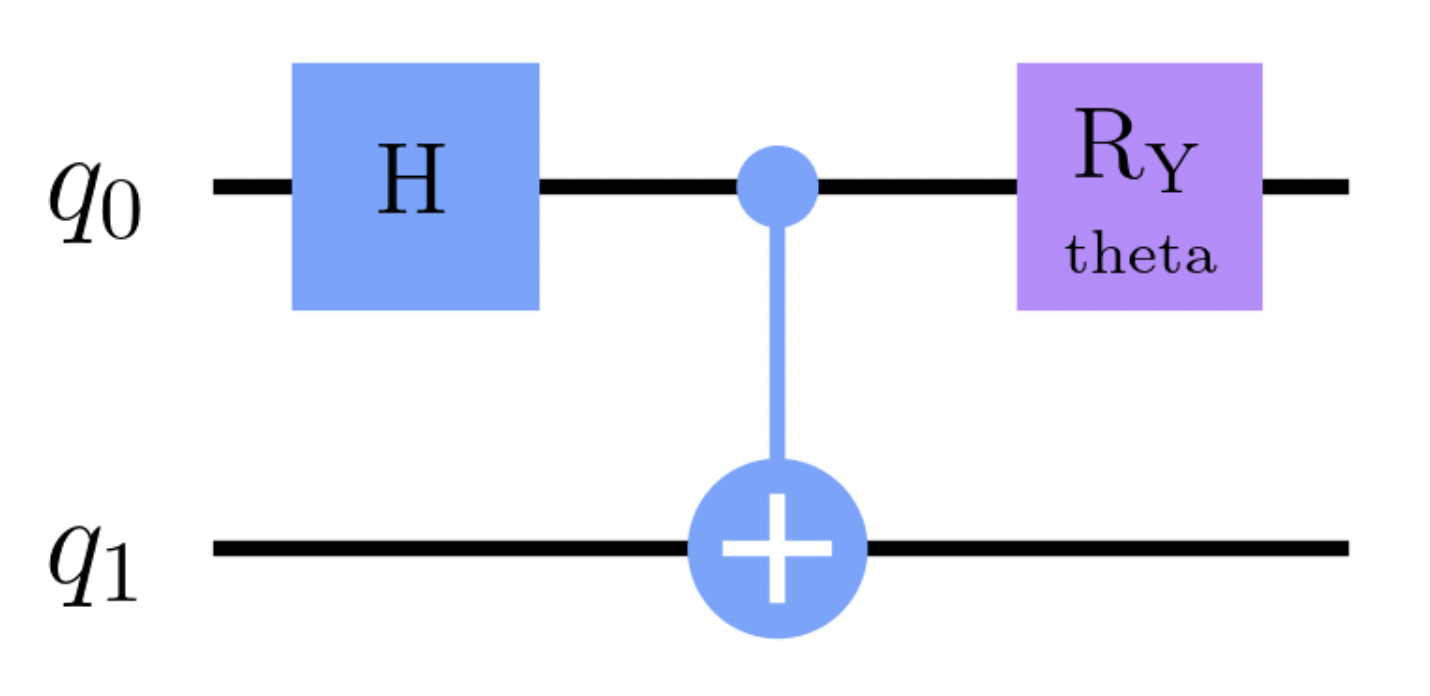

In [182]:
backend = service.backends(simulator=True)[0]
print(backend)

<IBMBackend('ibmq_qasm_simulator')>


In [228]:
sampler_circuit = bernstein_vazirani('11111')

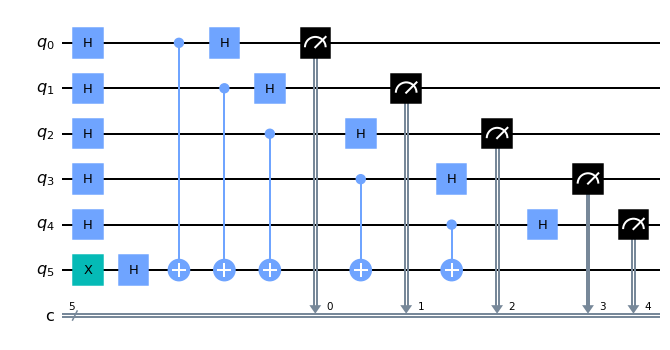

In [229]:
sampler_circuit.draw()

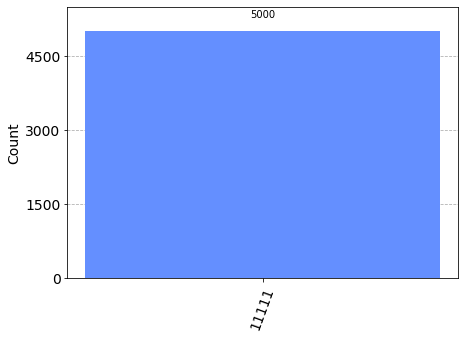

In [239]:
r = execute(sampler_circuit, backend = Aer.get_backend('qasm_simulator'), shots=5000).result()
c = r.get_counts()
plot_histogram(c)

In [253]:
# [sampler_circuit]*len(phases)

In [252]:
# [estimator_circuit]*len(phases)

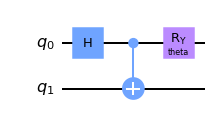

In [193]:
estimator_circuit = QuantumCircuit(2)

estimator_circuit.h(0)
estimator_circuit.cnot(0,1)
estimator_circuit.ry(theta=theta, qubit=0)
estimator_circuit.draw()

In [272]:
# parameters for estimator_circuit

number_of_phases = 10
phases = np.linspace(0, 2*np.pi, number_of_phases)
individual_phases = [[ph] for ph in phases]

# observables for estimator_circuit

Z0Z1 = SparsePauliOp.from_sparse_list([('ZZ',[0,1], 1)], num_qubits=2)
X0Z1 = SparsePauliOp.from_sparse_list([('XZ',[0,1], 1)], num_qubits=2)
Z0X1 = SparsePauliOp.from_sparse_list([('ZX',[0,1], 1)], num_qubits=2)
X0X1 = SparsePauliOp.from_sparse_list([('XX',[0,1], 1)], num_qubits=2)

ops = [Z0Z1, X0Z1, Z0X1, X0X1] # DO NOT CHANGE THE ORDER

In [273]:
fake_backend = FakeManila()
noise_model = NoiseModel.from_backend(fake_backend)

options_with_em_sampler = Options(
    simulator={ # Do not change values in simulator
        "noise_model": noise_model,
        "seed_simulator": 42,
    },  
    resilience_level = 1
)

options_with_em_estimator = Options(
    simulator={ # Do not change values in simulator
        "noise_model": noise_model,
        "seed_simulator": 42,
    },  
    # Without giving any resilience_level, Qiskit defaults to T-REX... So, I didn't have to specify resilience_level = 1
)

In [274]:
ops

[SparsePauliOp(['ZZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZX'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XZ'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['XX'],
               coeffs=[1.+0.j])]

In [275]:
with Session(service=service, backend=backend):
    
    sampler = Sampler(options=options_with_em_sampler)
    sampler_job = sampler.run(circuits=[sampler_circuit])
    sampler_result = sampler_job.result()
    
    estimator = Estimator(options=options_with_em_estimator)
    estimator_result = []
    for op in ops:
        job = estimator.run(circuits=[estimator_circuit]*len(individual_phases), parameter_values=individual_phases, observables=[op]*len(individual_phases))
        result = job.result()
        estimator_result.append(result)
    

In [276]:
result = [sampler_result, estimator_result]

In [277]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex5

grade_lab1_ex5(result) # Expected result type: List[SamplerResult, [EstimatorResult, EstimatorResult, EstimatorResult, EstimatorResult]]

Submitting your answer. Please wait...

Congratulations 🎉! Your answer is correct.


HTML(value='<img src="data:image/jpg;base64,/9j/4AAQSkZJRgABAQEAZABkAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw…

### Additional resource

You can check your `estimator_result` by plotting the graph below!

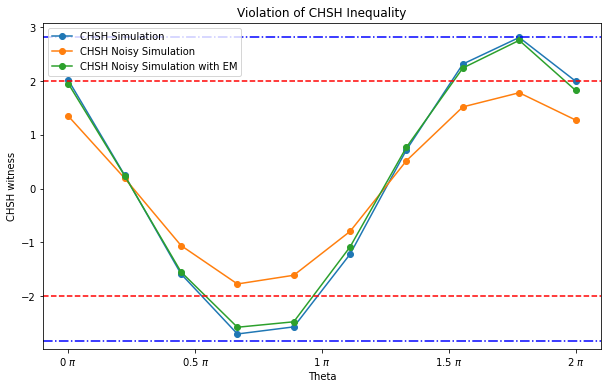

In [278]:
chsh_est_sim_val = [2.019, 0.25, -1.5855, -2.702, -2.57, -1.2165, 0.7235, 2.318, 2.812, 1.999]
chsh_est_noisy_val = [1.3495, 0.1935, -1.0575, -1.772, -1.61, -0.7935, 0.5215, 1.521, 1.784, 1.277]
chsh_est_em_val = estimator_result[0].values - estimator_result[1].values + estimator_result[2].values + estimator_result[3].values

fig, ax = plt.subplots(figsize=(10, 6))
# results from a simulator
ax.plot(phases/np.pi, chsh_est_sim_val, 'o-', label='CHSH Simulation')
ax.plot(phases/np.pi, chsh_est_noisy_val, 'o-', label='CHSH Noisy Simulation')
ax.plot(phases/np.pi, chsh_est_em_val, 'o-', label='CHSH Noisy Simulation with EM')
# classical bound +-2
ax.axhline(y=2, color='r', linestyle='--')
ax.axhline(y=-2, color='r', linestyle='--')
# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2)*2, color='b', linestyle='-.')
ax.axhline(y=-np.sqrt(2)*2, color='b', linestyle='-.')
# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
# set title, labels, and legend
plt.title('Violation of CHSH Inequality')
plt.xlabel('Theta')
plt.ylabel('CHSH witness')
plt.legend()

<a id="exercise6"></a>

<div class="alert alert-block alert-success">
    
<b> Exercise 6:</b> 
    
Did you figure out what the hidden message was? **Check out the answer below!**
    
</div>

In [281]:
message = "Captain's Log" # build your code here

In [282]:
# Submit your answer using following code
from qc_grader.challenges.fall_2022 import grade_lab1_ex6

grade_lab1_ex6(message) # Expected result type: str

Submitting your answer. Please wait...

Congratulations 🎉! Your answer is correct.
You successfully trigger the decoding sequence.

The author and timestamp are unscrambled first, and you discover the message was sent from...you.

From hundreds of years in the future.

The message is one of your own logs, a log you haven't recorded...yet?

Listen to the unscrambled Captain's Log here: https://www.youtube.com/watch?v=tBEcjZn56_E
        


# References
- [1] **[Scalable mitigation of measurement errors on quantum computers - Paul D. Nation,∗ Hwajung Kang, Neereja Sundaresan, and Jay M. Gambetta](https://arxiv.org/pdf/2108.12518.pdf)**
- [2] **[Documentation: mthree (1.1.0)](https://qiskit.org/documentation/partners/mthree/index.html)**
- [3] **[Fake Provider (qiskit.providers.fake_provider - Qiskit Documentation](https://qiskit.org/documentation/apidoc/providers_fake_provider.html)**
- [4] **[Getting Started - Qiskit Research](https://github.com/qiskit-research/qiskit-research/blob/main/docs/getting_started.ipynb)**
- [5] **[Error mitigation for short-depth quantum circuits - Kristan Temme, Sergey Bravyi and Jay M. Gambetta](https://arxiv.org/pdf/1612.02058.pdf)**
- [6] **[Configure error mitigation - release notes](https://github.com/Qiskit/qiskit-ibm-runtime/blob/main/docs/how_to/error-mitigation.rst)**

# Additional information

<b>Created by:</b> Dayeong Kang, Yuri Kobayashi, Vishal Bajpe, Kifumi Numata

<b>Advisor:</b> Ikko Hanamura

<b>Creative assets by:</b> Radha Pyari Sandhir

Version: 1.0

In [283]:
from qiskit.tools.jupyter import *
%qiskit_version_table